# MODELOS

In [5]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np


Trataremos tanto con modelos que son beneficiados por el uso de  normalizacion:

* Logistic Regresion
* CNN
    
Como con modelos que no la requieren:

* Decision Trees (Random Forest)
* XGBoost

Por ello disponemos de un dataset normalizado y otro sin normalizar.

In [6]:
tumor_patients_recaida = pd.read_csv('recaida.csv')
tumor_patients_recaida_norm = pd.read_csv('recaida_norm.csv')

In [7]:
tumor_patients_recaida

,Unnamed: 0,n_category,m_category,grade,ductal,lobular,neoadjuvant,age,diagnosis_age,dead,...,t_category_IS,stage_diagnosis_0,stage_diagnosis_IA,stage_diagnosis_IB,stage_diagnosis_IIA,stage_diagnosis_IIB,stage_diagnosis_IIIA,stage_diagnosis_IIIB,stage_diagnosis_IIIC,stage_diagnosis_IV
0,0,0.0,0.0,1.0,0.0,0.0,0.0,65.0,56.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,2.0,1.0,0.0,0.0,71.0,64.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,1.0,1.0,0.0,0.0,58.0,53.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,0.0,3.0,0.0,1.0,1.0,71.0,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,1.0,0.0,2.0,1.0,0.0,1.0,65.0,59.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9480,9480,3.0,0.0,2.0,1.0,0.0,1.0,65.0,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9481,9481,1.0,0.0,3.0,1.0,0.0,1.0,46.0,40.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9482,9482,0.0,0.0,2.0,0.0,0.0,0.0,75.0,68.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9483,9483,0.0,0.0,2.0,1.0,0.0,1.0,85.0,79.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
tumor_patients_recaida_norm

,Unnamed: 0,n_category,m_category,grade,ductal,lobular,neoadjuvant,age,diagnosis_age,dead,...,t_category_IS,stage_diagnosis_0,stage_diagnosis_IA,stage_diagnosis_IB,stage_diagnosis_IIA,stage_diagnosis_IIB,stage_diagnosis_IIIA,stage_diagnosis_IIIB,stage_diagnosis_IIIC,stage_diagnosis_IV
0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.527027,0.506024,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.000000,0.0,0.5,1.0,0.0,0.0,0.608108,0.602410,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.000000,0.0,0.0,1.0,0.0,0.0,0.432432,0.469880,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.333333,0.0,1.0,0.0,1.0,1.0,0.608108,0.614458,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0.333333,0.0,0.5,1.0,0.0,1.0,0.527027,0.542169,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9480,9480,1.000000,0.0,0.5,1.0,0.0,1.0,0.527027,0.578313,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9481,9481,0.333333,0.0,1.0,1.0,0.0,1.0,0.270270,0.313253,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9482,9482,0.000000,0.0,0.5,0.0,0.0,0.0,0.662162,0.650602,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9483,9483,0.000000,0.0,0.5,1.0,0.0,1.0,0.797297,0.783133,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


En primer lugar nos percatamos de que nos encontramos ante un dataset muy desbalanceado ya que el 90.14% de los datos corresponden a pacientes sin recaida, 

In [9]:
porcentaje_0 = (tumor_patients_recaida['m_category'] == 0).mean() * 100
porcentaje_1 = (tumor_patients_recaida['m_category'] == 1).mean() * 100

# Imprime los resultados
print(f'Porcentaje de pacientes sin recaida: {porcentaje_0:.2f}%')
print(f'Porcentaje de pacientes con recaida: {porcentaje_1:.2f}%')

Porcentaje de pacientes sin recaida: 90.14%
Porcentaje de pacientes con recaida: 9.86%


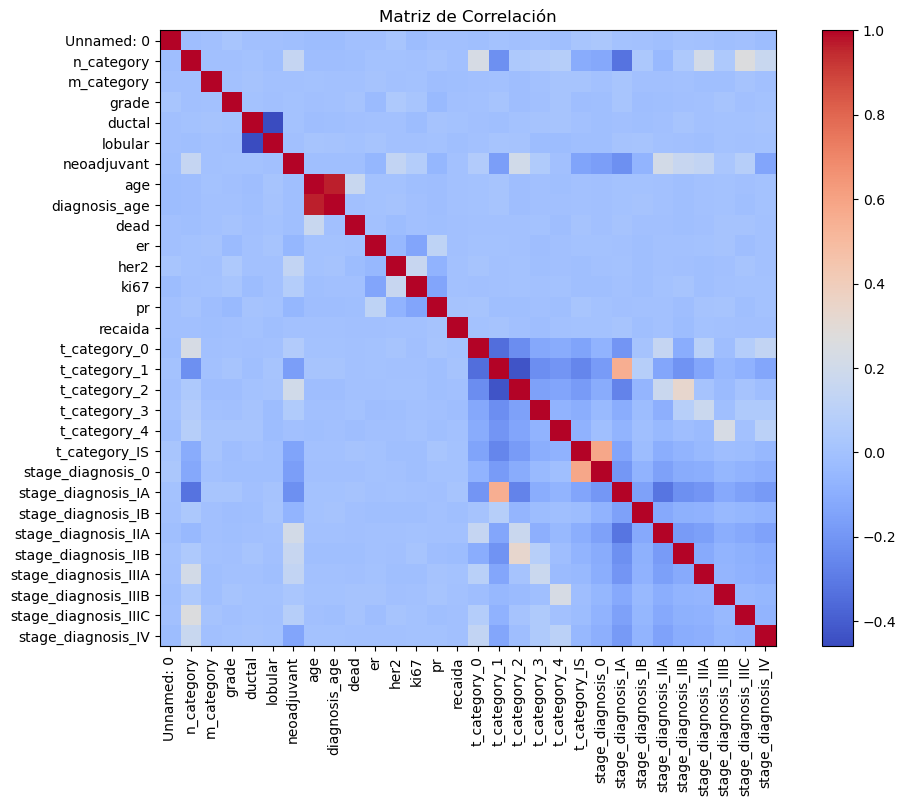

Columnas a eliminar:
{'diagnosis_age'}
Columnas eliminadas


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Cargar tu dataset
# Asumo que ya tienes las variables X e y definidas


# Calcular la matriz de correlación
matriz_correlacion = tumor_patients_recaida.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns, rotation=90)
plt.yticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)
plt.title("Matriz de Correlación")
plt.show()

# Eliminar las variables con correlación mayor al 80%
umbral_correlacion = 0.8
columnas_a_eliminar = set()

for i in range(len(matriz_correlacion.columns)):
    for j in range(i):
        if abs(matriz_correlacion.iloc[i, j]) > umbral_correlacion:
            columna = matriz_correlacion.columns[i]
            columnas_a_eliminar.add(columna)

print("Columnas a eliminar:")
print(columnas_a_eliminar)
# Eliminar las columnas con alta correlación
tumor_patients_recaida.drop(columns=list(columnas_a_eliminar), inplace=True)

# Imprimir las columnas eliminadas
print("Columnas eliminadas")


MODELO PREDICCIÓN RECAIDA 

In [11]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar el dataset
# Asumiendo que tumor_patients_recaida es tu DataFrame
# Asegúrate de tener tus columnas de características (X) y la columna objetivo (y)
X = tumor_patients_recaida.drop('recaida', axis=1)
y = tumor_patients_recaida['recaida']

# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



modelo_naive_bayes = GaussianNB()
modelo_naive_bayes.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_pred = modelo_naive_bayes.predict(X_test)


print('---------------------------Classification Report---------------------\n')
print(classification_report(y_test, y_pred))


---------------------------Classification Report---------------------

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        98
         1.0       0.90      1.00      0.94       850

    accuracy                           0.90       948
   macro avg       0.45      0.50      0.47       948
weighted avg       0.80      0.90      0.85       948



In [12]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

# Cargar el dataset
# Asumiendo que tumor_patients_recaida es tu DataFrame
# Asegúrate de tener tus columnas de características (X) y la columna objetivo (y)
# Ejemplo: X = tumor_patients_recaida.drop('columna_objetivo', axis=1)
#          y = tumor_patients_recaida['columna_objetivo']

# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Inicializar y entrenar el modelo de árbol de decisiones
modelo_arbol = DecisionTreeClassifier(random_state=42, class_weight='balanced')
modelo_arbol.fit(X_train, y_train)

# Predecir con el conjunto de validación
y_pred = modelo_arbol.predict(X_test)


print('---------------------------Classification Report---------------------\n')
print(classification_report(y_test, y_pred))



---------------------------Classification Report---------------------

              precision    recall  f1-score   support

         0.0       0.13      0.16      0.14        98
         1.0       0.90      0.87      0.89       850

    accuracy                           0.80       948
   macro avg       0.51      0.52      0.51       948
weighted avg       0.82      0.80      0.81       948



In [13]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# # Definir los hiperparámetros a ajustar
# parametros_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Inicializar el modelo RandomForest con class_weight
# modelo_forest = RandomForestClassifier(random_state=42, class_weight='balanced')

# # Configurar la Grid Search con validación cruzada
# grid_search = GridSearchCV(estimator=modelo_forest, param_grid=parametros_grid, cv=5, scoring='recall')

# # Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
# grid_search.fit(X_train, y_train)

# # Obtener los mejores hiperparámetros
# mejores_parametros = grid_search.best_params_
# print("Mejores hiperparámetros:", mejores_parametros)

# # Obtener el modelo con los mejores hiperparámetros
# mejor_modelo_forest = grid_search.best_estimator_

# # Evaluar el modelo en el conjunto de validación
# y_pred_mejor_modelo = mejor_modelo_forest.predict(X_val)

# print('---------------------------Classification Report---------------------\n')
# print(classification_report(y_test, y_pred_mejor_modelo))
